# Classification and Regression

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier




## Importing the dataset wine

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

### About the columns of the dataset


In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
X=wine['data']
y=wine['target']

### Scaling example


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test),

(142, 36, 142, 36)

In [8]:
ss = StandardScaler()
standardized_array = ss.fit_transform(X_train)

In [9]:
standardized_array


array([[ 1.44367601, -0.76011544, -0.18512819, ...,  0.99867717,
         0.28728343,  1.68770195],
       [ 0.99389104, -0.71663128,  1.21592611, ...,  1.36253133,
         0.54118954,  1.54572142],
       [-0.89270702,  1.32712445, -0.62756639, ..., -1.36637486,
        -0.86939993,  0.34677468],
       ...,
       [-1.69232475, -0.87317427,  1.21592611, ...,  0.04356   ,
         0.9079428 , -0.20537184],
       [-0.94268313, -1.0123236 , -2.28670965, ...,  1.49897664,
         0.6399308 , -0.08547717],
       [-0.13057138, -0.87317427, -0.18512819, ..., -0.86607539,
        -1.87091845, -0.36312799]])

In [11]:
mmsc = MinMaxScaler()
normalized_array2 = mmsc.fit_transform(X_train)


In [12]:
normalized_array2.flatten(order='c')



array([1.        , 0.19565217, 0.45394737, ..., 0.4796748 , 0.73207547,
       0.24750357])

### Imputer example


In [10]:
sim = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
trans=sim.fit_transform(X_train)

In [12]:
trans

array([[1.412e+01, 1.480e+00, 2.320e+00, ..., 1.170e+00, 2.820e+00,
        1.280e+03],
       [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.225e+01, 3.880e+00, 2.200e+00, ..., 6.500e-01, 2.000e+00,
        8.550e+02],
       ...,
       [1.161e+01, 1.350e+00, 2.700e+00, ..., 9.600e-01, 3.260e+00,
        6.800e+02],
       [1.221e+01, 1.190e+00, 1.750e+00, ..., 1.280e+00, 3.070e+00,
        7.180e+02],
       [1.286e+01, 1.350e+00, 2.320e+00, ..., 7.600e-01, 1.290e+00,
        6.300e+02]])

In [13]:
knnimputer = KNNImputer(n_neighbors=2)
knnimputer.fit_transform(wine['data'])

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### Encoder example

In [14]:
from scipy.sparse import hstack

alcohol = X[:, 0]
alcohol_categories = np.digitize(alcohol, bins=[10, 13]) 
alcohol_categories = alcohol_categories.reshape(-1, 1)

encoder = OneHotEncoder()
alcohol_encoded = encoder.fit_transform(alcohol_categories)
alcohol_encoded_dense = alcohol_encoded.toarray()

X_encoded = np.concatenate([alcohol_encoded_dense, X[:, 1:]], axis=1)



In [15]:
X_encoded

array([[0.000e+00, 1.000e+00, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [0.000e+00, 1.000e+00, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [0.000e+00, 1.000e+00, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [0.000e+00, 1.000e+00, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [0.000e+00, 1.000e+00, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [0.000e+00, 1.000e+00, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [16]:
encoder = LabelEncoder()
alcohol_encoded = encoder.fit_transform(alcohol_categories)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
alcohol_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Pipeline and column transformer

In [18]:
X = wine.data
y = wine.target

numeric_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
categorical_features = [] 





In [19]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [20]:

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
    
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_processed = preprocessor.fit_transform(X_train, y_train)

In [23]:
X_processed

array([[ 1.66529275, -0.60840587,  1.21896194, ...,  3.41947305,
        -1.65632857, -0.87940904],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.0248012 ,
        -0.58463272, -1.25462095],
       [-0.74531007, -1.14354109, -0.93750727, ..., -0.24006834,
         0.35845962,  0.2462267 ],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.0515345 ,
         1.04434496,  0.56585166],
       [-0.35374006, -0.7399965 , -0.36244882, ..., -0.86434305,
         0.01551695, -0.74044166],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.97197662,
        -0.67036839,  1.09392769]])

In [24]:
pipeline = Pipeline(
    [
        ('scaling', StandardScaler()),
        ('logreg', LogisticRegression())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('logreg', LogisticRegression())])

In [26]:
y_pred = pipeline.predict(X_test)

In [27]:
y_pred

array([0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1,
       0])

In [28]:

accuracy_score(y_test, y_pred)

0.9775280898876404

### SVC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


In [30]:
X = wine['data'][:, :2]
y = wine['target']

In [31]:
def train_and_plot(kernel, gamma, C):
    svm = SVC(kernel=kernel, gamma=gamma, C=C)
    svm.fit(X, y)
    
    DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        xlabel=wine['feature_names'][0],
        ylabel=wine['feature_names'][1]
    )

    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.show()

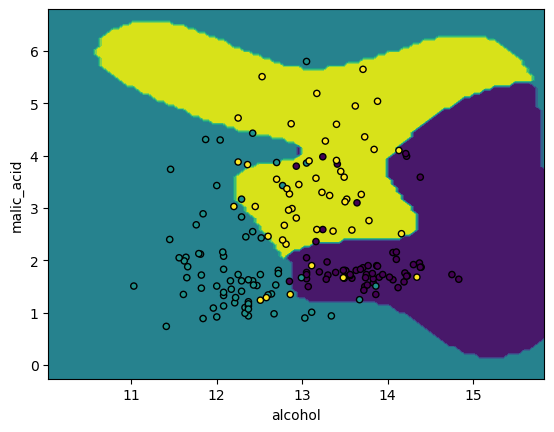

In [32]:
train_and_plot('rbf', 0.5, 100)

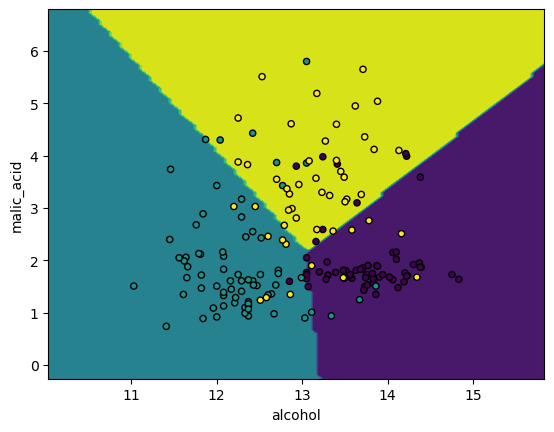

In [33]:
train_and_plot('linear', 0.5, 1)

In [34]:
param_grid = {
    'C': [0.01,0.1, 1, 10,100],
    'gamma': [1, 0.1, 0.001, 0.0001]
}

grid = GridSearchCV(SVC(), param_grid, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.389 total time=   0.0s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.389 total time=   0.0s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.389 total time=   0.0s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.444 total time=   0.0s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.471 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.389 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.1;, score=0.389 total time=   0.0s
[CV 3/5] END .................C=0.01, gamma=0.1;, score=0.389 total time=   0.0s
[CV 4/5] END .................C=0.01, gamma=0.1;, score=0.444 total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=0.1;, score=0.471 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.389 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [35]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [36]:
grid_predictions = grid.predict(X_test)

In [37]:
accuracy_score(y_test, grid_predictions)

0.8202247191011236

### K-Neighbour Classifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [39]:
len(X_train), len(X_test), len(y_train), len(y_test)

(89, 89, 89, 89)

In [40]:
knn = KNeighborsClassifier(n_neighbors=4)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
y_pred

array([0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1,
       2])

In [44]:
y_test

array([0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2,
       2])

In [45]:
print(accuracy_score(y_test, y_pred))

0.7752808988764045


### Random Forest


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rf.predict(X_test)

In [49]:
accuracy_score(y_pred, y_test)

0.7640449438202247

### Random search

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
ne = np.random.randint(7, 200, 100)
md = np.random.randint(1, 25, 30)
param_dist = {'n_estimators': ne, 'max_depth': md}

In [52]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=3, verbose=2)

In [53]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................max_depth=17, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=9, n_estimators=192; total time=   0.3s
[CV] END ......................max_depth=9, n_estimators=192; total time=   0.4s
[CV] END ......................max_depth=9, n_estimators=192; total time=   0.3s
[CV] END ......................max_depth=22, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=22, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=22, n_estimators=93; total time=   0.2s
[CV] END .....................max_depth=18, n_estimators=153; total time=   0.3s
[CV] END .....................max_depth=18, n_estimators=153; total time=   0.3s
[CV] END .....................max_depth=18, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 8, 10,  1, 18, 10, 15, 21,  1, 11, 19,  6,  5, 16, 22, 16, 21, 12,
        7,  4,  5, 19,  9, 18,  3, 22, 20, 17, 10, 19,  7]),
                                        'n_estimators': array([137, 130,  81,  60,  73, 189,  50,  43, 167, 197, 133,  22, 116,
       125, 101,  81, 153, 137, 129, 141,  55,  29, 187,  75,  74, 116,
        77,  89, 143, 191, 191, 192, 196, 181, 143,  93,  56,  19, 143,
        69,  92,  87, 180, 187,  79, 140, 101, 163,  67,  35, 163, 148,
        69, 121, 157, 118,  92, 189,  77,  88, 121, 140,  53, 124,  12,
       159,  20,  87,  94,  66,  17, 152, 143,  55, 191,  57, 164,  99,
       149, 185,  19, 175,  17,  16,  63, 121,  34, 114,  18,  73, 112,
       108, 116, 168,  37,  44, 175, 110, 135,  95])},
                   verbose=2)

In [54]:
y_pred = random_search.best_estimator_.predict(X_test)

In [55]:
accuracy_score(y_pred, y_test)

0.7640449438202247

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

In [57]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [58]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

[Text(0.409375, 0.9642857142857143, 'x[0] <= 12.78\nentropy = 1.567\nsamples = 178\nvalue = [59.0, 71.0, 48.0]'),
 Text(0.075, 0.8928571428571429, 'x[0] <= 12.185\nentropy = 0.612\nsamples = 73\nvalue = [0, 62, 11]'),
 Text(0.05, 0.8214285714285714, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.1, 0.8214285714285714, 'x[1] <= 2.1\nentropy = 0.83\nsamples = 42\nvalue = [0, 31, 11]'),
 Text(0.05, 0.75, 'x[0] <= 12.49\nentropy = 0.402\nsamples = 25\nvalue = [0, 23, 2]'),
 Text(0.025, 0.6785714285714286, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16, 0]'),
 Text(0.075, 0.6785714285714286, 'x[1] <= 1.315\nentropy = 0.764\nsamples = 9\nvalue = [0, 7, 2]'),
 Text(0.05, 0.6071428571428571, 'x[0] <= 12.625\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.025, 0.5357142857142857, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.075, 0.5357142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.1, 0.6071428571428571, 'entropy = 0.0\nsamples = 6\nva

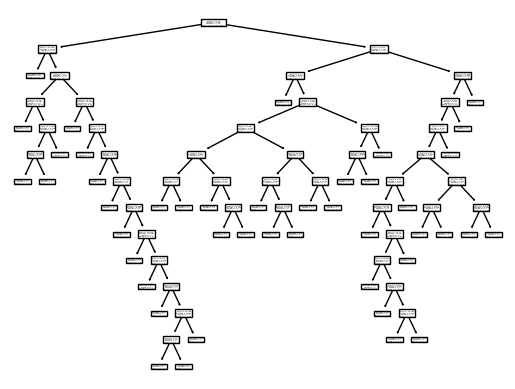

In [59]:
sklearn.tree.plot_tree(dt)

## ----------------------------------------------------------------------------------------------------------------------------------

## Clustering

### Here we have imported another csv file that is related to the credit card details

In [60]:
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [61]:
df = pd.read_csv('Customer_Data.csv')

In [62]:
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [63]:
X=df[['BALANCE','PAYMENTS','MINIMUM_PAYMENTS']]

<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

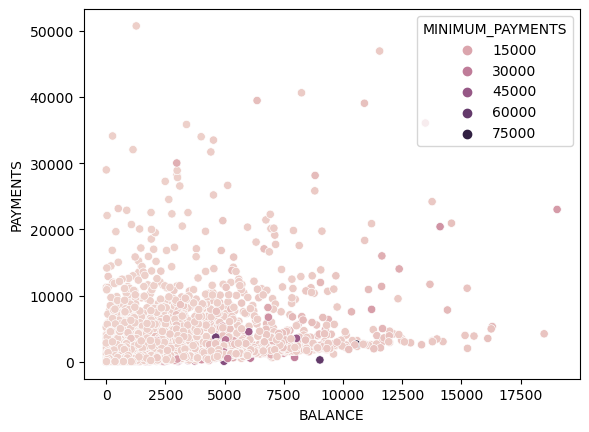

In [64]:
sns.scatterplot(data=X, x='BALANCE', y='PAYMENTS', hue='MINIMUM_PAYMENTS')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X[['BALANCE', 'PAYMENTS']], X['MINIMUM_PAYMENTS'], test_size=0.2)

In [66]:
for i in X_train, X_test, y_train, y_test:
    print(len(i))

7160
1790
7160
1790


In [67]:
X_train_normed = normalize(X_train)
X_test_normed = normalize(X_test)

In [68]:
pd.DataFrame(X_train_normed)

,0,1
0,0.976663,0.214779
1,0.113408,0.993548
2,0.000000,1.000000
3,0.494445,0.869209
4,0.359285,0.933228
...,...,...
7155,0.711499,0.702687
7156,0.577457,0.816421
7157,0.250774,0.968046
7158,0.973968,0.226685


In [69]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_normed)

KMeans(n_clusters=4)

In [70]:
centroids = kmeans.cluster_centers_
centroids_map = {'x':[], 'y':[]}
for x, y in centroids:
    centroids_map['x'].append(x)
    centroids_map['y'].append(y)

print(centroids_map)

centroids_df = pd.DataFrame(centroids_map, columns=['x', 'y'])

centroids_df

{'x': [0.9662371230832516, 0.11298679954782531, 0.829580813205741, 0.48246063256250865], 'y': [0.23813704385620138, 0.9905557857624281, 0.5460922343043826, 0.8437514905406045]}


,x,y
0,0.966237,0.238137
1,0.112987,0.990556
2,0.829581,0.546092
3,0.482461,0.843751


<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

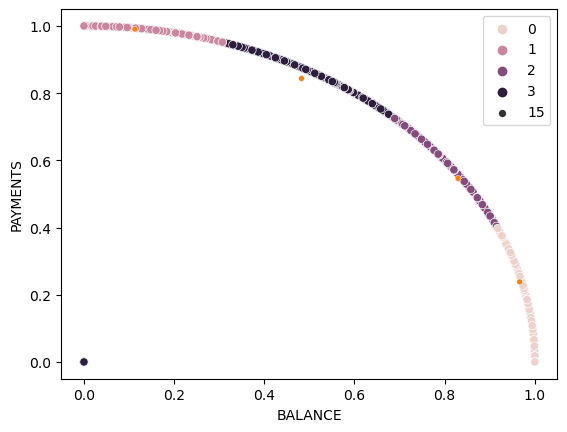

In [71]:
dfnormed = pd.DataFrame(X_train_normed, columns=['BALANCE','PAYMENTS'])
sns.scatterplot(data=dfnormed, x='BALANCE', y='PAYMENTS', hue=kmeans.labels_)
sns.scatterplot(data=centroids_df, x='x', y='y', size=15)

<AxesSubplot:ylabel='MINIMUM_PAYMENTS'>

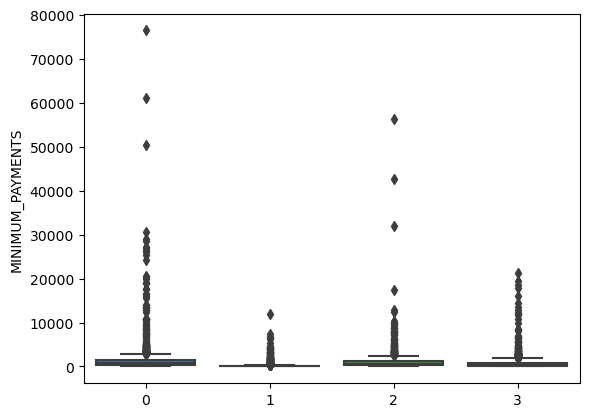

In [72]:
sns.boxplot(x=kmeans.labels_, y=y_train)

In [73]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_normed, kmeans.labels_, metric='euclidean')

0.6465884282286853

In [74]:
K = range(2, 5) 
fits = list()
score = list()

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_train_normed)

    fits.append(model)

    score.append(silhouette_score(X_train_normed, model.labels_, metric='euclidean'))

<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

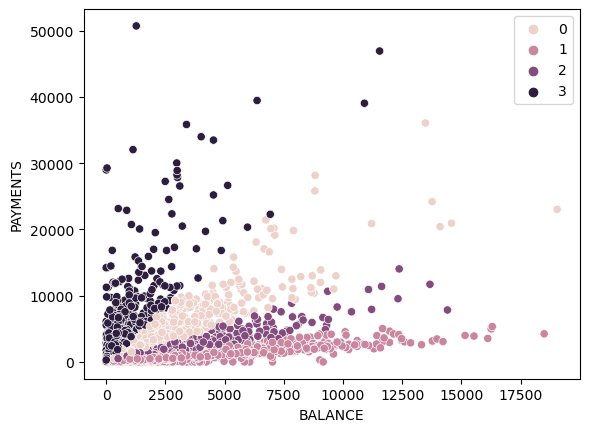

In [75]:
sns.scatterplot(data = X_train, x = 'BALANCE', y = 'PAYMENTS', hue = fits[2].labels_)

<AxesSubplot:ylabel='MINIMUM_PAYMENTS'>

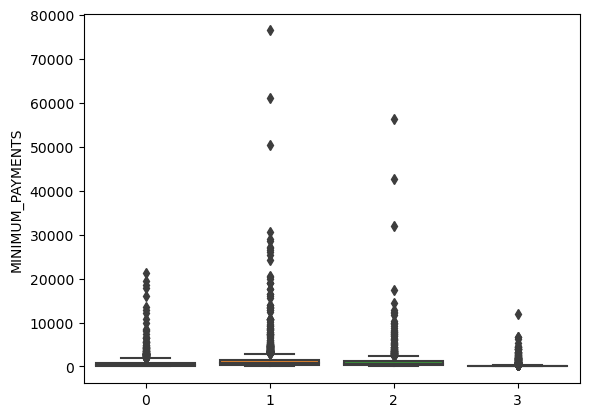

In [76]:
sns.boxplot(x=fits[2].labels_, y=y_train)

### Agglomerative clustering

In [77]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [78]:
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=0.7)

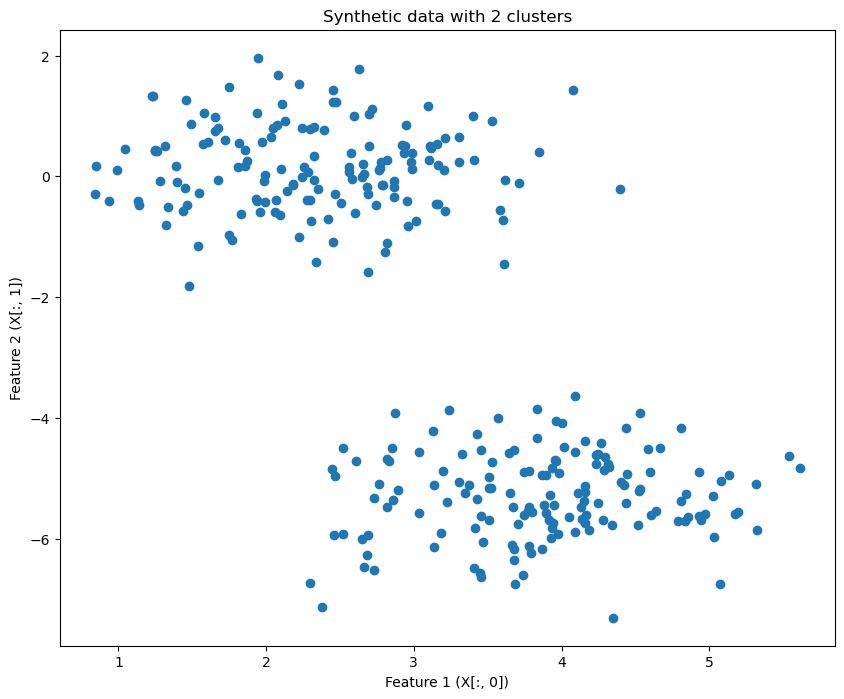

In [79]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic data with 2 clusters")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [80]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
clustering.fit(X)

AgglomerativeClustering(linkage='complete')

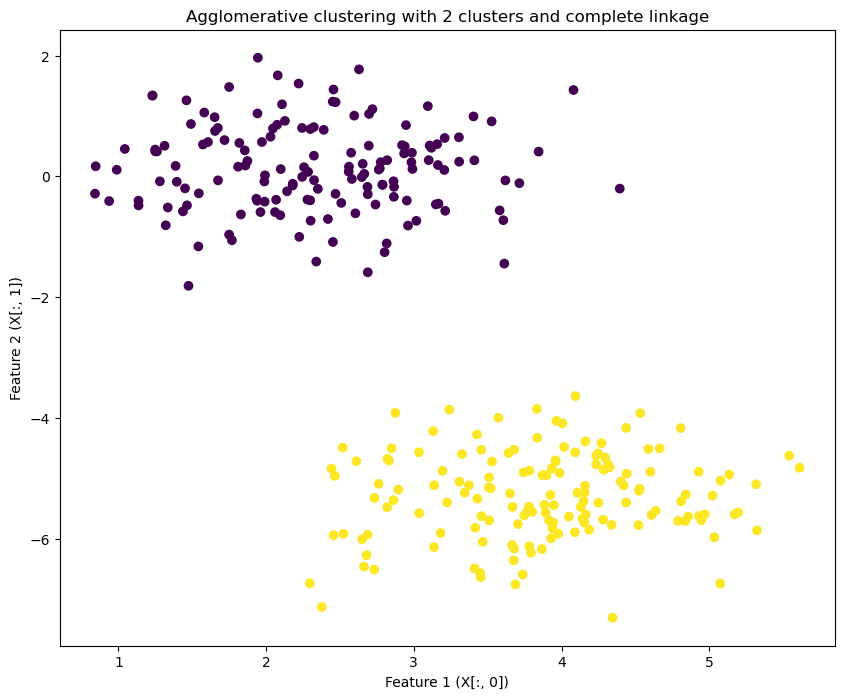

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 2 clusters and complete linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()

In [82]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
clustering.fit(X)

AgglomerativeClustering(linkage='single')

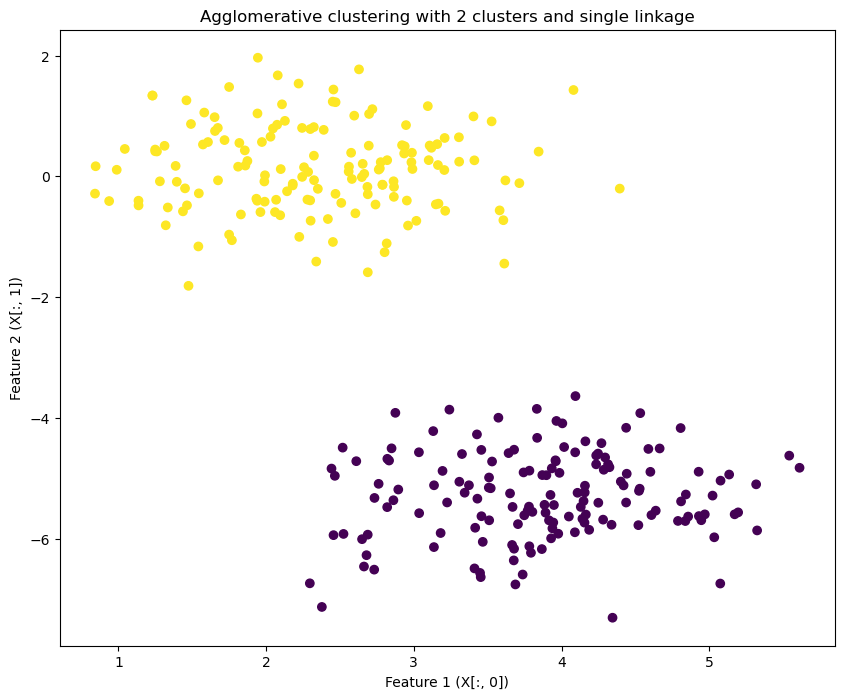

In [83]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Agglomerative clustering with 2 clusters and single linkage")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")
plt.show()